In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()
df = pd.read_csv('/Users/ani/Desktop/python/dsa/bhai_again/wom_dataset.csv')

columns = list(df.columns)
columns[0] = 'STATE'
columns[1] = 'CRIME'
df.columns = columns
dateCols = columns[2:]
df['full'] = df.apply(lambda row: sum(row.loc[dateCols]), axis=1)
totalColumns = [x for x in df['STATE'].unique() if x.startswith('TOTAL')]
total = totalColumns[-1]


In [2]:
allStates = [x for x in df['STATE'].unique() if not x.startswith('TOTAL')]
allCrimes = [x for x in df['CRIME'].unique() if not x.startswith('TOTAL')]

In [3]:
totalColumns

['TOTAL (STATES)', 'TOTAL (UTs)', 'TOTAL (ALL-INDIA)']

In [4]:
statecrime = df.pivot(index='STATE',columns='CRIME',values='full')

In [5]:
statecrime

CRIME              ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
STATE                                                                    
A & N ISLANDS                                                    273     
ANDHRA PRADESH                                                 54230     
ARUNACHAL PRADESH                                                849     
ASSAM                                                          18970     
BIHAR                                                          10879     
CHANDIGARH                                                       385     
CHHATTISGARH                                                   22565     
D & N HAVELI                                                      64     
DAMAN & DIU                                                       17     
DELHI                                                           9848     
GOA                                                              339     
GUJARAT                                                        12869     
HARYANA                                                         6790     
HIMACHAL PRADESH                                                4495     
JAMMU & KASHMIR                                                23536     
JHARKHAND                                                       4410     
KARNATAKA                                                      32785     
KERALA                                                         37489     
LAKSHADWEEP                                                        3     
MADHYA PRADESH                                                 95459     
MAHARASHTRA                                                    47369     
MANIPUR                                                          404     
MEGHALAYA                                                        356     
MIZORAM                                                          814     
NAGALAND                                                         105     
ODISHA                                                         42169     
PUDUCHERRY                                                       949     
PUNJAB                                                          5054     
RAJASTHAN                                                      34409     
SIKKIM                                                           262     
TAMIL NADU                                                     26904     
TOTAL (ALL-INDIA)                                             565280     
TOTAL (STATES)                                                553741     
TOTAL (UTs)                                                    11539     
TRIPURA                                                         3087     
UTTAR PRADESH                                                  42603     
UTTARAKHAND                                                     2335     
WEST BENGAL                                                    22205     

CRIME              COMMISSION OF SATI (P) ACT  \
STATE                                           
A & N ISLANDS                               0   
ANDHRA PRADESH                              0   
ARUNACHAL PRADESH                           0   
ASSAM                                       0   
BIHAR                                       0   
CHANDIGARH                                  0   
CHHATTISGARH                                7   
D & N HAVELI                                0   
DAMAN & DIU                                 0   
DELHI                                       0   
GOA                                         0   
GUJARAT                                     0   
HARYANA                                     0   
HIMACHAL PRADESH                            0   
JAMMU & KASHMIR                             0   
JHARKHAND                                   0   
KARNATAKA                                   0   
KERALA                                      0   
LAKSHADWEEP                                 0   
MADHYA PRA

In [6]:
totalCounts = statecrime.loc[total]
statecrime /= totalCounts
onlystatecrime = statecrime.drop(totalColumns)
statecrime

CRIME              ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
STATE                                                                    
A & N ISLANDS                                               0.000483     
ANDHRA PRADESH                                              0.095935     
ARUNACHAL PRADESH                                           0.001502     
ASSAM                                                       0.033559     
BIHAR                                                       0.019245     
CHANDIGARH                                                  0.000681     
CHHATTISGARH                                                0.039918     
D & N HAVELI                                                0.000113     
DAMAN & DIU                                                 0.000030     
DELHI                                                       0.017421     
GOA                                                         0.000600     
GUJARAT                                                     0.022766     
HARYANA                                                     0.012012     
HIMACHAL PRADESH                                            0.007952     
JAMMU & KASHMIR                                             0.041636     
JHARKHAND                                                   0.007801     
KARNATAKA                                                   0.057998     
KERALA                                                      0.066319     
LAKSHADWEEP                                                 0.000005     
MADHYA PRADESH                                              0.168870     
MAHARASHTRA                                                 0.083797     
MANIPUR                                                     0.000715     
MEGHALAYA                                                   0.000630     
MIZORAM                                                     0.001440     
NAGALAND                                                    0.000186     
ODISHA                                                      0.074598     
PUDUCHERRY                                                  0.001679     
PUNJAB                                                      0.008941     
RAJASTHAN                                                   0.060871     
SIKKIM                                                      0.000463     
TAMIL NADU                                                  0.047594     
TOTAL (ALL-INDIA)                                           1.000000     
TOTAL (STATES)                                              0.979587     
TOTAL (UTs)                                                 0.020413     
TRIPURA                                                     0.005461     
UTTAR PRADESH                                               0.075366     
UTTARAKHAND                                                 0.004131     
WEST BENGAL                                                 0.039281     

CRIME              COMMISSION OF SATI (P) ACT  \
STATE                                           
A & N ISLANDS                            0.00   
ANDHRA PRADESH                           0.00   
ARUNACHAL PRADESH                        0.00   
ASSAM                                    0.00   
BIHAR                                    0.00   
CHANDIGARH                               0.00   
CHHATTISGARH                             0.28   
D & N HAVELI                             0.00   
DAMAN & DIU                              0.00   
DELHI                                    0.00   
GOA                                      0.00   
GUJARAT                                  0.00   
HARYANA                                  0.00   
HIMACHAL PRADESH                         0.00   
JAMMU & KASHMIR                          0.00   
JHARKHAND                                0.00   
KARNATAKA                                0.00   
KERALA                                   0.00   
LAKSHADWEEP                              0.00   
MADHYA PRA

In [7]:
def plotCrime(crime):
    import matplotlib.pyplot as plt
    data = onlystatecrime.loc[:, crime].reset_index()
    data['STATEINDEX'] = list(range(data.shape[0]))
    data.plot.scatter(x='STATEINDEX',y=crime,title=crime)
    plt.show()
def classifyByCrime(crime,knn=3):
    data = onlystatecrime.loc[:, crime].reset_index()
    data['STATEINDEX'] = list(range(data.shape[0]))
    cutoff = data[crime].mean()
    data['LABEL'] = data.apply(lambda row: int(row[crime] > cutoff), axis=1)
    X = data[['STATEINDEX', crime]]
    y = pd.Categorical.from_codes(data['LABEL'],['SAFE','UNSAFE'])
    y = pd.get_dummies(y, drop_first=True)
    
    # doing the classification
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    knn = KNeighborsClassifier(n_neighbors=knn, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    sns.scatterplot(
    x='STATEINDEX',
    y=crime,
    hue='UNSAFE',
    data=X.join(y, how='outer'),
    ).set(title=crime)
  
    


In [8]:
print(allCrimes)

['RAPE', 'KIDNAPPING AND ABDUCTION', 'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY', 'INSULT TO THE MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES (IPC SECTION 498A)', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRY', 'IMMORAL TRAFFIC (P) ACT', 'DOWRY PROHIBITION ACT', 'INDECENT REPRESENTATION OF WOMEN (P) ACT', 'COMMISSION OF SATI (P) ACT']


/Users/ani/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


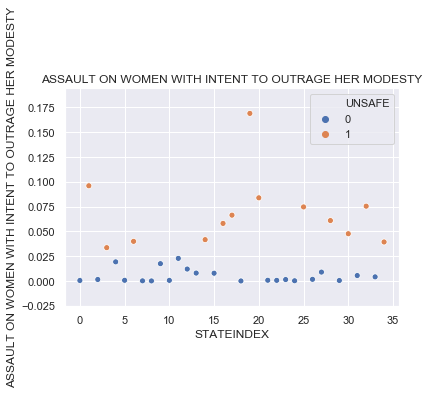

In [10]:
classifyByCrime(allCrimes[3],2)